In [48]:
import numpy as np

from gscore.fdr import GlobalDistribution

In [94]:
model_path = "/home/aaron/projects/ghost/data/spike_in/models/peptide.test"

In [117]:
global_model = GlobalDistribution.load(model_path)

In [118]:
import pandas as pd

check = pd.DataFrame(
    {
        "label": global_model.labels.ravel(),
        "scores": global_model.scores.ravel()
    }
)

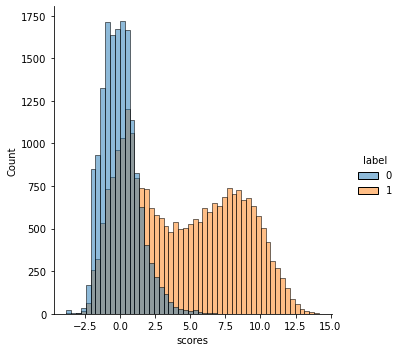

In [119]:
import seaborn as sns

sns.displot(check, x="scores", hue="label")

In [120]:
function_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.target_scores.ravel(),
        "type": ["Target" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

In [121]:
function_check

,label,scores,type
0,-3.388299,0.0,Target
1,-3.382587,0.0,Target
2,-3.376875,0.0,Target
3,-3.371163,0.0,Target
4,-3.365450,0.0,Target
...,...,...,...
995,2.295334,0.0,Target
996,2.301046,0.0,Target
997,2.306759,0.0,Target
998,2.312471,0.0,Target


In [122]:
decoy_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.decoy_scores.ravel(),
        "type": ["Decoy" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

all_scores = pd.concat(
    [
        function_check,
        decoy_check
    ]
).reset_index()

<AxesSubplot:xlabel='label', ylabel='scores'>

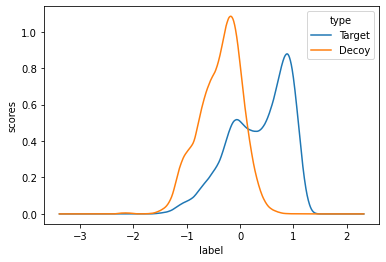

In [123]:
sns.lineplot(data=all_scores, x="label", y="scores", hue="type")

In [125]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.00071949, 0.        , 0.00175577, ..., 0.00622504, 0.0097865 ,
       0.0097103 ])

In [76]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.00090972, 0.        , 0.00260083, ..., 0.00375804, 0.00853121,
       0.00938467])